In [4]:
from operator import indexOf
from tarfile import data_filter

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.ma.extras import column_stack
from setuptools.command.rotate import rotate

In [5]:
data=np.random.randint(10,100,(4,3))
index=['virat','dhoni','panda','champ']
columns=['m1','m2','m3']

df=pd.DataFrame(data=data,index=index,columns=columns)
df

,m1,m2,m3
virat,77,90,50
dhoni,14,95,18
panda,50,82,40
champ,78,81,32


In [6]:
df.loc[['virat','dhoni'],['m1','m3']]

,m1,m3
virat,77,50
dhoni,14,18


In [7]:
df.iloc[:2,:2]

,m1,m2
virat,77,90
dhoni,14,95


In [8]:
df.iloc[:2,:]

,m1,m2,m3
virat,77,90,50
dhoni,14,95,18


In [9]:
student=np.array([('anurag',45,56),('achintya',34,22)],dtype=[('name','U10'),('marks','i4'),('age','i4')])
student['name']

array(['anurag', 'achintya'], dtype='<U10')

In [10]:
df=pd.read_csv(r"C:\Users\dai\Downloads\MS_Dhoni_ODI_record.csv")
df

,score,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,odi_number
0,0,0,1,0,0,0,v Bangladesh,Chattogram,23/12/2004,ODI # 2199
1,12,12,11,109.09,2,0,v Bangladesh,Dhaka,26/12/2004,ODI # 2201
2,7*,7,2,350,0,1,v Bangladesh,Dhaka,27/12/2004,ODI # 2202
3,3,3,7,42.85,0,0,v Pakistan,Kochi,02/04/2005,ODI # 2235
4,148,148,123,120.32,15,4,v Pakistan,Visakhapatnam,05/04/2005,ODI # 2236
...,...,...,...,...,...,...,...,...,...,...
345,56*,56,61,91.8,3,2,v West Indies,Manchester,27/06/2019,ODI # 4175
346,42*,42,31,135.48,4,1,v England,Birmingham,30/06/2019,ODI # 4179
347,35,35,33,106.06,4,0,v Bangladesh,Birmingham,02/07/2019,ODI # 4182
348,DNB,-,-,-,-,-,v Sri Lanka,Leeds,06/07/2019,ODI # 4187


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   score        350 non-null    object
 1   runs_scored  350 non-null    object
 2   balls_faced  350 non-null    object
 3   strike_rate  350 non-null    object
 4   fours        350 non-null    object
 5   sixes        350 non-null    object
 6   opposition   350 non-null    object
 7   ground       350 non-null    object
 8   date         350 non-null    object
 9   odi_number   350 non-null    object
dtypes: object(10)
memory usage: 27.5+ KB


In [12]:
df['date']=pd.to_datetime(df['date'],dayfirst=True)
df

,score,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,odi_number
0,0,0,1,0,0,0,v Bangladesh,Chattogram,2004-12-23,ODI # 2199
1,12,12,11,109.09,2,0,v Bangladesh,Dhaka,2004-12-26,ODI # 2201
2,7*,7,2,350,0,1,v Bangladesh,Dhaka,2004-12-27,ODI # 2202
3,3,3,7,42.85,0,0,v Pakistan,Kochi,2005-04-02,ODI # 2235
4,148,148,123,120.32,15,4,v Pakistan,Visakhapatnam,2005-04-05,ODI # 2236
...,...,...,...,...,...,...,...,...,...,...
345,56*,56,61,91.8,3,2,v West Indies,Manchester,2019-06-27,ODI # 4175
346,42*,42,31,135.48,4,1,v England,Birmingham,2019-06-30,ODI # 4179
347,35,35,33,106.06,4,0,v Bangladesh,Birmingham,2019-07-02,ODI # 4182
348,DNB,-,-,-,-,-,v Sri Lanka,Leeds,2019-07-06,ODI # 4187


In [13]:
df['year']=df['date'].apply(lambda x : str(x).split('-')[0])
df

,score,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,odi_number,year
0,0,0,1,0,0,0,v Bangladesh,Chattogram,2004-12-23,ODI # 2199,2004
1,12,12,11,109.09,2,0,v Bangladesh,Dhaka,2004-12-26,ODI # 2201,2004
2,7*,7,2,350,0,1,v Bangladesh,Dhaka,2004-12-27,ODI # 2202,2004
3,3,3,7,42.85,0,0,v Pakistan,Kochi,2005-04-02,ODI # 2235,2005
4,148,148,123,120.32,15,4,v Pakistan,Visakhapatnam,2005-04-05,ODI # 2236,2005
...,...,...,...,...,...,...,...,...,...,...,...
345,56*,56,61,91.8,3,2,v West Indies,Manchester,2019-06-27,ODI # 4175,2019
346,42*,42,31,135.48,4,1,v England,Birmingham,2019-06-30,ODI # 4179,2019
347,35,35,33,106.06,4,0,v Bangladesh,Birmingham,2019-07-02,ODI # 4182,2019
348,DNB,-,-,-,-,-,v Sri Lanka,Leeds,2019-07-06,ODI # 4187,2019


In [14]:
str(df['opposition'][0])[2:]

'Bangladesh'

In [15]:
df_cleaned=df['opposition'].apply(lambda x: str(x)[2:])
df['opposition']=df_cleaned

In [16]:
df.head(5)

,score,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,odi_number,year
0,0,0,1,0,0,0,Bangladesh,Chattogram,2004-12-23,ODI # 2199,2004
1,12,12,11,109.09,2,0,Bangladesh,Dhaka,2004-12-26,ODI # 2201,2004
2,7*,7,2,350,0,1,Bangladesh,Dhaka,2004-12-27,ODI # 2202,2004
3,3,3,7,42.85,0,0,Pakistan,Kochi,2005-04-02,ODI # 2235,2005
4,148,148,123,120.32,15,4,Pakistan,Visakhapatnam,2005-04-05,ODI # 2236,2005


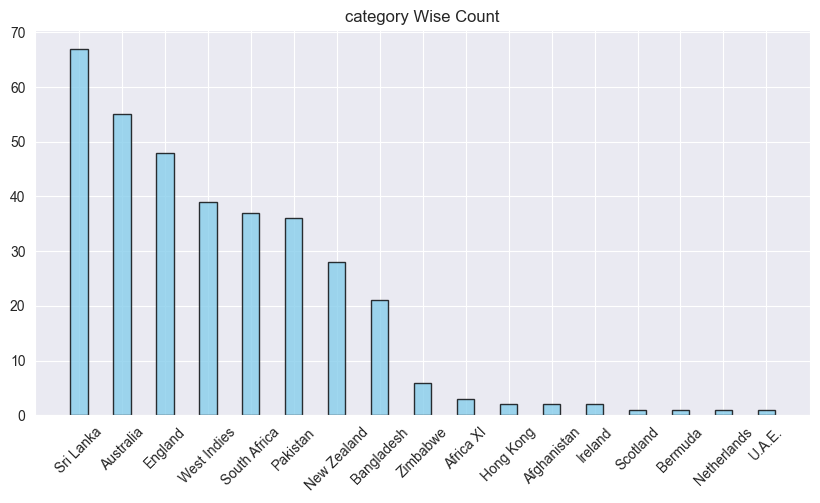

In [17]:
plt.figure(figsize=(10,5))
x_grouped=df['opposition'].value_counts()
plt.bar(x=x_grouped.index,height=x_grouped.values,color='skyblue',edgecolor='black',linewidth=1,alpha=0.8,width=.4)
plt.title('category Wise Count')
plt.xticks(rotation=45)
plt.show()

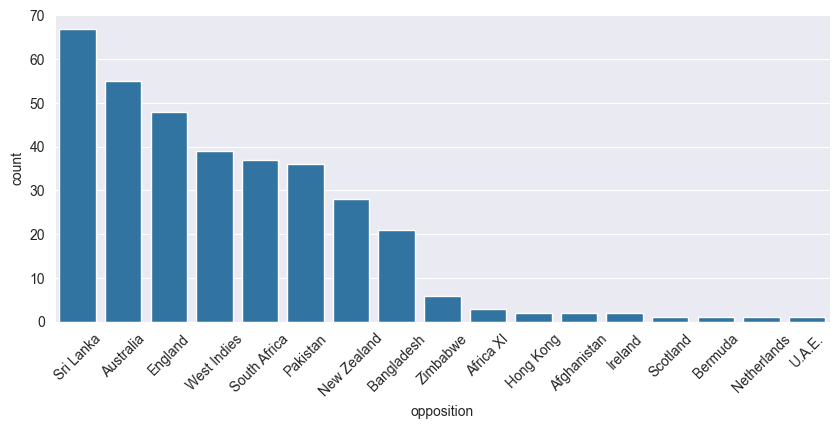

In [18]:
plt.figure(figsize=(10,4))
sns.barplot(x_grouped)
plt.xticks(rotation=45)
plt.show()


# cleaned scores

In [19]:
df['runs_scored']=df['runs_scored'].replace('-',0)
df['runs_scored']=df['runs_scored'].apply(lambda x:int(x))
df['runs_scored'].unique()

array([  0,  12,   7,   3, 148,  28,  47,  11,  24,   2,  15,  20,  56,
        37,  67,  38, 183,  45,  80,  17,  14,  68,  72,  77,  13,  10,
        96,  59,  18,  46,  23,  51,  55,  26,  44,  62,   6,  40,  48,
        29,  91,  36,  33, 139,  19,  21,  35,  50,  58,   4,   5,  63,
        49,  88,  31,  64, 109,  76,  39,  71,   1,   9,  61,  94,  53,
        84,  41,  95,   8,  34, 124, 107, 101,  32,  25,  22,  69,  78,
        87,  75, 113,  54,  27,  65,  79,  52,  85,  92, 134,  42])

[]

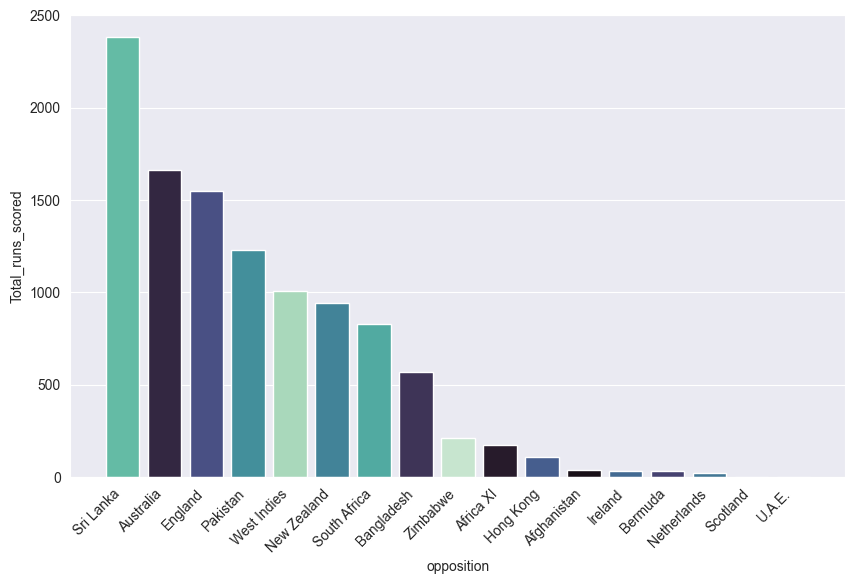

In [35]:
plt.figure(figsize=(10,6))
x_grouped=df.groupby('opposition')['runs_scored'].sum().to_frame("Total_runs_scored")
order=x_grouped.sort_values(by='Total_runs_scored',ascending=False).index
sns.barplot(x=x_grouped.index,y=x_grouped['Total_runs_scored'],order=order,hue=x_grouped.index,legend=False,palette='mako')
plt.xticks(rotation=45,ha='right')
plt.plot()


In [22]:
df

,score,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,odi_number,year
0,0,0,1,0,0,0,Bangladesh,Chattogram,2004-12-23,ODI # 2199,2004
1,12,12,11,109.09,2,0,Bangladesh,Dhaka,2004-12-26,ODI # 2201,2004
2,7*,7,2,350,0,1,Bangladesh,Dhaka,2004-12-27,ODI # 2202,2004
3,3,3,7,42.85,0,0,Pakistan,Kochi,2005-04-02,ODI # 2235,2005
4,148,148,123,120.32,15,4,Pakistan,Visakhapatnam,2005-04-05,ODI # 2236,2005
...,...,...,...,...,...,...,...,...,...,...,...
345,56*,56,61,91.8,3,2,West Indies,Manchester,2019-06-27,ODI # 4175,2019
346,42*,42,31,135.48,4,1,England,Birmingham,2019-06-30,ODI # 4179,2019
347,35,35,33,106.06,4,0,Bangladesh,Birmingham,2019-07-02,ODI # 4182,2019
348,DNB,0,-,-,-,-,Sri Lanka,Leeds,2019-07-06,ODI # 4187,2019
